In [1]:
import random
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
def construct_graph(data):
    # structure: [(own, {prev, next}), ... ]
    ids = [(x[1], {'prev': x[0], 'next': x[2]}) for x in data]
    
    G = nx.DiGraph()
    G.add_nodes_from(ids)

    for n1, data in G.nodes(data=True):
        for n2, data in G.nodes(data=True):
            if n2 == G.nodes[n1]['next']:
                G.add_edge(n1, n2)
                
    return G

#### LOPA Data

Example XML file [here](https://confluence.aerq.com/display/SD/LOPA+and+CIDS)

Get seat rows and neighbors using following xquery:

```
for $x in .//section[@location="main-deck"]/compartment[@class!="Galley"]/column[@description="right"]/seat-group
return (data($x/@row), data($x/device/connection/destination[starts-with(@device, "QPU") or starts-with(@device, "QEB")]/@seat-group), '&#xa;')
```

Test [here](http://www.xpathtester.com/xquery)

In [13]:
# '0' manually inserted
raw = '''
1 5 2 
2 1 0
3 10 4 
4 3 5 
5 4 1 
6 15 7 
7 6 8 
8 7 9 
9 8 10 
10 9 3 
11 20 12 
12 11 13 
13 12 14 
14 13 15 
15 14 6 
16 25 17 
17 16 18 
18 17 19 
19 18 20 
20 19 11 
21 30 22 
22 21 23 
23 22 24 
24 23 25 
25 24 16 
26 35 27 
27 26 28 
28 27 29 
29 28 30 
30 29 21 
31 0 32 
32 31 33 
33 32 34 
34 33 35 
35 34 26 
'''

data = [(int(x[1]), int(x[0]), int(x[2])) for x in [x.split() for x in raw.strip().split('\n')]]
data

[(5, 1, 2),
 (1, 2, 0),
 (10, 3, 4),
 (3, 4, 5),
 (4, 5, 1),
 (15, 6, 7),
 (6, 7, 8),
 (7, 8, 9),
 (8, 9, 10),
 (9, 10, 3),
 (20, 11, 12),
 (11, 12, 13),
 (12, 13, 14),
 (13, 14, 15),
 (14, 15, 6),
 (25, 16, 17),
 (16, 17, 18),
 (17, 18, 19),
 (18, 19, 20),
 (19, 20, 11),
 (30, 21, 22),
 (21, 22, 23),
 (22, 23, 24),
 (23, 24, 25),
 (24, 25, 16),
 (35, 26, 27),
 (26, 27, 28),
 (27, 28, 29),
 (28, 29, 30),
 (29, 30, 21),
 (0, 31, 32),
 (31, 32, 33),
 (32, 33, 34),
 (33, 34, 35),
 (34, 35, 26)]

The way the example LOPA XML file is constructed requires topological sorting

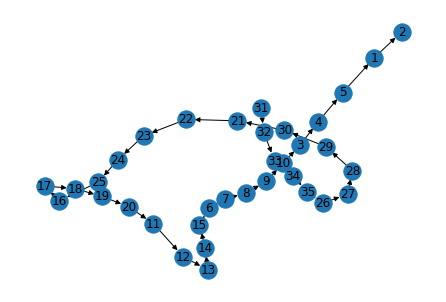

In [14]:
G = construct_graph(data)
nx.draw(G, with_labels=True)

In [15]:
nx.is_weakly_connected(G)

True

In [16]:
topo_order = [x for x in nx.topological_sort(G)]

lopa = []

for i, ids in enumerate(reversed(topo_order)):
    lopa.append((i+1, ids))
    
lopa = pd.DataFrame(lopa, columns=['topological_order', 'seatrow']).set_index('topological_order')
lopa

,seatrow
topological_order,
1,2
2,1
3,5
4,4
5,3
6,10
7,9
8,8
9,7


In [17]:
lopa.loc[10]

seatrow    6
Name: 10, dtype: int64

#### Network Topology Data

In [18]:
random_macs = '''
b0:68:02:50:e3:34
57:00:2b:0d:9f:22
1b:5b:6e:fe:2f:20
65:a6:20:00:50:a5
19:94:99:d0:03:17
a9:3d:15:f7:3c:4f
19:47:d8:e8:dc:47
f6:ad:09:47:08:14
fe:71:9c:3a:f6:79
2c:1f:fc:a9:10:12
33:a2:d3:06:56:35
8e:4b:c1:c7:56:f2
f1:9b:5a:3b:cc:47
68:f0:58:cf:11:dc
72:7a:bf:a6:86:66
60:0b:21:a8:f4:ee
8b:16:0c:e9:84:99
0a:0e:fd:f8:0c:18
ad:5e:05:2f:e7:f5
2b:a2:f0:52:a0:a1
49:69:de:8b:fc:23
43:7f:85:be:e7:c1
a2:14:73:3f:21:e2
ac:aa:be:d3:1b:4b
dc:c0:0b:c9:de:cd
8c:aa:b7:f6:4f:69
50:7c:69:a0:6a:b3
d3:64:c5:b4:99:43
06:31:bb:80:ed:d1
ac:77:0a:dc:af:73
d1:ce:16:1c:fb:1d
36:3f:78:58:db:4e
7f:4a:89:44:ae:06
bf:cd:08:5f:9c:3e
24:70:28:1d:3d:74
f9:d6:3d:59:83:c0
'''

d = defaultdict(int)
for k, v in enumerate(random_macs.strip().split('\n')):
    d[k] = v

macs_data = [(d[int(x[0])], d[int(x[1])], d[int(x[2])]) for x in data]
random.shuffle(macs_data)
macs_data  # (downstream, own, upstream)

[('d1:ce:16:1c:fb:1d', '43:7f:85:be:e7:c1', 'a2:14:73:3f:21:e2'),
 ('50:7c:69:a0:6a:b3', 'd3:64:c5:b4:99:43', '06:31:bb:80:ed:d1'),
 ('f6:ad:09:47:08:14', 'fe:71:9c:3a:f6:79', '2c:1f:fc:a9:10:12'),
 ('0a:0e:fd:f8:0c:18', 'ad:5e:05:2f:e7:f5', '2b:a2:f0:52:a0:a1'),
 ('d3:64:c5:b4:99:43', '06:31:bb:80:ed:d1', 'ac:77:0a:dc:af:73'),
 ('dc:c0:0b:c9:de:cd', '8c:aa:b7:f6:4f:69', '8b:16:0c:e9:84:99'),
 ('36:3f:78:58:db:4e', '7f:4a:89:44:ae:06', 'bf:cd:08:5f:9c:3e'),
 ('60:0b:21:a8:f4:ee', '19:47:d8:e8:dc:47', 'f6:ad:09:47:08:14'),
 ('8e:4b:c1:c7:56:f2', 'f1:9b:5a:3b:cc:47', '68:f0:58:cf:11:dc'),
 ('f9:d6:3d:59:83:c0', '50:7c:69:a0:6a:b3', 'd3:64:c5:b4:99:43'),
 ('7f:4a:89:44:ae:06', 'bf:cd:08:5f:9c:3e', '24:70:28:1d:3d:74'),
 ('8b:16:0c:e9:84:99', '0a:0e:fd:f8:0c:18', 'ad:5e:05:2f:e7:f5'),
 ('f1:9b:5a:3b:cc:47', '68:f0:58:cf:11:dc', '72:7a:bf:a6:86:66'),
 ('2b:a2:f0:52:a0:a1', '49:69:de:8b:fc:23', '8e:4b:c1:c7:56:f2'),
 ('a9:3d:15:f7:3c:4f', '57:00:2b:0d:9f:22', '1b:5b:6e:fe:2f:20'),
 ('57:00:2

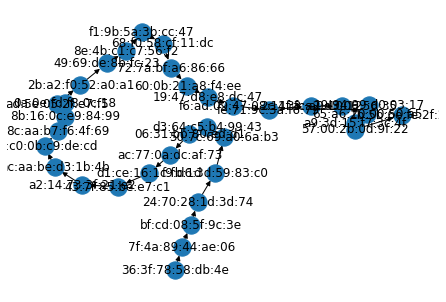

In [19]:
G = construct_graph(macs_data)
nx.draw(G, with_labels=True)

In [20]:
nx.is_weakly_connected(G)

True

In [21]:
macs_topo = [x for x in nx.topological_sort(G)]

macs_topo_order = []

for i, ids in enumerate(reversed(macs_topo)):
    macs_topo_order.append((i+1, ids))
    
macs_topo_order = pd.DataFrame(macs_topo_order, columns=['topological_order', 'mac']).set_index('topological_order')
macs_topo_order

,mac
topological_order,
1,1b:5b:6e:fe:2f:20
2,57:00:2b:0d:9f:22
3,a9:3d:15:f7:3c:4f
4,19:94:99:d0:03:17
5,65:a6:20:00:50:a5
6,33:a2:d3:06:56:35
7,2c:1f:fc:a9:10:12
8,fe:71:9c:3a:f6:79
9,f6:ad:09:47:08:14


#### Merge LOPA and Network Topology

In [22]:
seatmap = pd.merge(lopa.reset_index(), macs_topo_order.reset_index(), on='topological_order').set_index('seatrow').sort_index()
seatmap

,topological_order,mac
seatrow,,
1,2,57:00:2b:0d:9f:22
2,1,1b:5b:6e:fe:2f:20
3,5,65:a6:20:00:50:a5
4,4,19:94:99:d0:03:17
5,3,a9:3d:15:f7:3c:4f
6,10,19:47:d8:e8:dc:47
7,9,f6:ad:09:47:08:14
8,8,fe:71:9c:3a:f6:79
9,7,2c:1f:fc:a9:10:12
